---
# FILT préparation à la méthode bilinéaire : différentiateurs
---

Si vous naviguez ici avec Github, cliquez ici [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/balaise31/Signal/master?labpath=discret%2Ftp%2FFILT_prepa_bilineaire.ipynb) pour pouvoir **exécuter en ligne** le code octave ou python.

|        | Sujet | Corrigé |
|--------|-------|---------|
|Python  | [sujet python](./FILT_prepa_bilineaire_python.ipynb) | [corrigé python](./FILT_prepa_bilineaire_python_corr.ipynb) |
|Octave  | [sujet octave](./FILT_prepa_bilineaire.ipynb) | [corrigé octave](./FILT_prepa_bilineaire_octave_corr.ipynb) |



## I - Etude des différentiateurs
---


L'exercice 2.1 du polycopié a permi de proposer trois différentiateurs dérivés de 3 intégrateurs permettant d'approcher le comportement de l'opérateur dérivé $D$ et de la variable associée $p$ :

$D =\frac{d}{dt} \leftrightarrow p \leftrightarrow \underbrace{\frac{1}{T_e}(1-z^{-1})}_{\text{Backward Euler}}\leftrightarrow \underbrace{\frac{1}{T_e}(z-1)}_{\text{Forward Euler}} \leftrightarrow \underbrace{\frac{2}{T_e}\frac{1-z^{-1}}{1+z^{-1}}}_{\text{Bilinéaire ou Tustin}} 
$

Dans la suite nous notons $H_f$, $H_b$ et $H_t$ les fonctions de trasnfert des systmes respectifs "forward", "backward" et "trapezoidal"

### I1 - Récurrences
Voici 4 récurrences qui sont à associer à ces 3 différentiateurs :
- $ y[k] = \frac{x[k+1]-x[k]}{T_e} $
- $ \frac{y[k+1] + y[k]}{2} = \frac{x[k+1]-x[k]}{T_e}$
- $ y[k] = \frac{x[k]-x[k-1]}{T_e} $
- $ y[k+1] = \frac{x[k+1]-x[k]}{T_e} $

Lequel de ces différentiateurs n'est pas causal ?

Voici trois phrases à associer à chacun des différentiateur :
- Te fois la sortie à l'instant k vaut l'incrément de l'entrée entre les instants k et k-1
- la pente entre l'instant k et k+1 vaut la moyenne de la sortie aux instants k et k+1  
- Te fois la sortie à l'instant k-1 vaut l'incrément de l'entrée entre les instants k et k-1




## II - Réponses harmoniques
---

Nous allons justifier et retrouver :
 - pourquoi il faut remplacer $G(p)$ par $G(j\omega)$ en continu pour obtenir la réponse harmonique (le Bode)
 - et par quoi il faut remplacer $G(z)$ pour obtenir $G(\omega)$ et le bode en discret
 
Nous l'utilisons ensuite pour trouver les réponses harmoniques des différentiateurs backward et forward.

Le différentiateur bilinéaire est finalement traité.


### II-1 - passage de TF à la réponse harmonique

On va considérer le passage d'ondes pures continues $e^{i\omega\,t}$ et discrètes $e^{i\omega\,k\,T_e}$. Il est fréquent et pratique de considérer les fréquences ou bien pulsations normalisées par rapport à $F_e$ soit avec :
$\tilde{f} = \frac{f}{F_e} = \tilde{\omega} = \frac{\omega}{\omega_e}$

 1) Retrouvez la relation entre l'opérateur $p$ et $\omega$ puis $\tilde{f}$ en regardant ce que donne la dérivée de l'onde pure continue $e^{i\omega\,t}$. Dessinez dans le plan complexe le lieu de $p$ lorsque $\tilde{f}$ va de $-\infty$ à $+\infty$

 2) De même, retrouvez la relation entre l'opérateur $z$ et $\omega$ puis $\tilde{f}$ en regardant ce que donne **l'avance d'un échantillon** sur l'onde pure discrète $e^{i\omega\,k\,T_e}$. Dessinez dans le plan complexe le lieu de $z$ lorsque $\tilde{f}$ va de $0$ à $1$ puis de $-\infty$ à $+\infty$
 
 

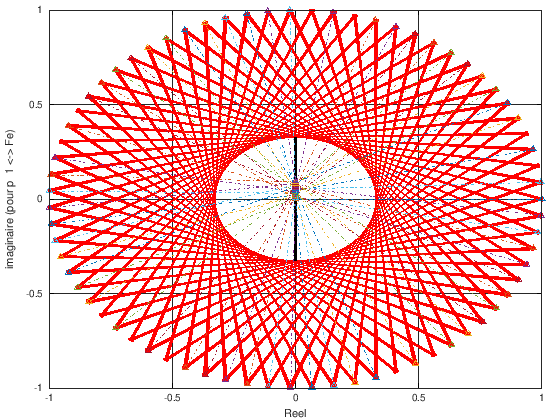

In [1]:
clear all; close all; clc;
Fe=48000;N=100;Df=Fe/N;Te=1/Fe;
f=-2*Fe:Df:2*Fe;         % vecteur des fréquences
w=2*pi*f;            % vecteur des pulsations

%% VOTRE CODE:  f_tilde =
% Calculant la fréquence normalisée à partir de f et/ou de w
f_tilde = f;

%% VOTRE CODE:  p = 
% définissez le vecteur p à partir de f_tilde
% par défaut i = sqrt(-1)  permet de faire des complexes
p=i*f;

%% VOTRE CODE:  z = 
% définissez le vecteur z à partir de f_tilde
% la fonction 'exp' de matlab est vectorisée et complexe.
z=exp(i*f);       


%% Le code suivant  affiche dans le plan complexe
% en noir le lieu de p (avec l'axe imaginaire tel que 1 <-> Fe)
% en rouge le lieu de z
% 
plot(real(z),imag(z),'r.-');hold on;
plot(real(p),imag(p)/2/pi/Fe,'k.-');
sel = (2*N)+1:1:N*2.6;
plot([real(p(sel)) ; real(z(sel))], [imag(p(sel))/2/pi/Fe ; imag(z(sel))],'-.>'); 
grid on;
xlabel('Reel');
ylabel('imaginaire (pour p  1 <-> Fe)');

### II-2 - Réponse harmonique du Forward et Backward : géométrique
Ecrivez les fonctions de transfert en fonction de $z$ et non pas $z^{-1}$ pour obtenir plus facilement l'expression des réponses harmoniques.

 1) Dessinez, sous forme de vecteur dans le plan complexe, le vecteur $1-z$ (pôle en $1$) et le vecteur $z-1$ (pôle en $-1$). On prendra pour $z$ un point quelconque du cercle unité. La tradition veut que les pôles soient dessinés par "des petits plus" + et les zéros par "des petits ronds".
 2) Donnez et dessinez le module et l'argument de ces vecteurs pour $\tilde{f}$ proche de $0$ de $0.25$ et $0.5$.  
 Déduisez-en géométriquement un équivalent de la réponse harmonique du dérivateur Forward $H_f(\tilde{f})$ autour de ces fréquences. 
 3) Faites de même pour un zéro en $0$. Comparez avec l'effet d'un retard de $T_e$ et concluez que c'est bête en fait !
 4) Déduisez alors géométriquement un équivalent de la réponse harmonique du dérivateur Backward $H_B(\tilde{f})$ pour $\tilde{f}$ proche de $0$ de $0.25$ et $0.5$.  

Modifiez le code suivant pour vérifier les valeurs 0, 0.25, 0.5

In [30]:
% fonctions de transfert (fonctions inline de la variable z VECTORISEE "./")
Hf = @(z) ((z-1)/Te);  %Forward
Hb = @(z) ((z-1)./z/Te);  %Backward

%% VOTRE CODE : z_0 =
% calculez l'équivalent harmonique de z pour w=0 
z_0 = 0;

%% VOTRE CODE : z_quart =
% calculez l'équivalent harmonique de z pour w=we/4
% soit f normalisée de 1/4
z_quart = 0;

%% VOTRE CODE : z_nyquist =
% calculez l'équivalent harmonique de z pour w=we/2
% la fréquence la plus haute possible
z_nyquist = 0;

%% On affiche ici les modules et arguments de Hf(w) et Hb(w)
le_w = 0; le_z = z_0;
printf("f normalisée = %d, Hf module = %f, Hf argument = %f degrés\n",le_w,abs(Hf(le_z)),arg(Hf(le_z))/pi*180)
le_w = 1/4; le_z = z_quart;
printf("f normalisée = %d, Hf module = %f, Hf argument = %f degrés\n",le_w,abs(Hf(le_z)),arg(Hf(le_z))/pi*180)
le_w = 1/2; le_z = z_nyquist;
printf("f normalisée = %d, Hf module = %f, Hf argument = %f degrés\n",le_w,abs(Hf(le_z)),arg(Hf(le_z))/pi*180)

f normalisée = 0, Hf module = 48000.000000, Hf argument = 180.000000 degrés
f normalisée = 0.25, Hf module = 48000.000000, Hf argument = 180.000000 degrés
f normalisée = 0.5, Hf module = 48000.000000, Hf argument = 180.000000 degrés


### II-2 - Réponse harmonique du Forward et Backward : analytique

 5) Calculez analytiquement (remplacez $z$ par $e^{i2\pi\tilde{f}}$, et calculez module et argument) ces deux réponses harmoniques que vous exprimerez aussi bien en fonction de $\omega$ que de $\tilde{f}$.  
 Faites apparaître des cosinus et sinus avec **ASTUCE !**  
 Factoriser les $e^{i\,\omega\,T_e} \pm 1$ en $e^{\frac{-i\,\omega\,T_e}{2}}(e^{\frac{i\,\omega\,T_e}{2}} \pm e^{\frac{-i\,\omega\,T_e}{2}})$ et avec la vision d'Euler obtenez des $e^{i.\ldots.\omega}\cos(\ldots\omega)$ ou avec des $\sin$.  
 6) Vérifiez géométriquement ces résultats avec les équivalents des questions précédentes.
 7) Esquissez un grahique de la réponse harmonique (module et argument) en échelle linéaire ($\tilde{f}\in[-2\,,\, 2]$) puis logarithmique (Diagramme de Bode avec $\tilde{f}\in]\frac{1}{10}\,,\, 2]$).

Modifiez le code suivant pour vérifier vos calculs

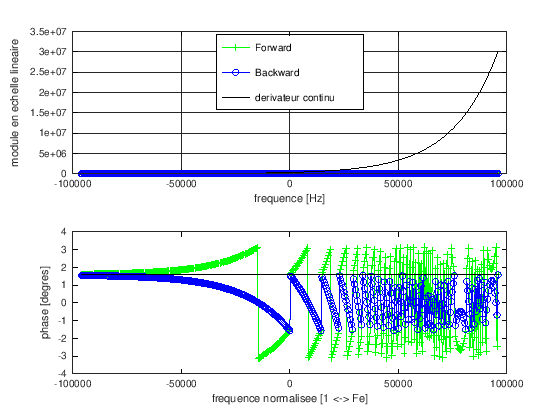

In [17]:
% fonctions de transfert (fonctions inline de la variable z VECTORISEE "./")
Hf = @(z) ((z-1)/Te);  %Forward
Hb = @(z) ((z-1)./z/Te);  %Backward

%% VOTRE MODIF :
% Passez l'axe des fréquences en unités normalisées (1<-> Fe)
% Passez la phase en degrés
subplot(211)
plot(f,abs(Hf(z)),'g+-'); hold on;
plot(f,abs(Hb(z)),'bo-'); 
plot(f,abs(p),'k'); grid on;
xlabel("frequence [Hz]");
ylabel("module en echelle lineaire")
legend(["Forward";"Backward";"derivateur continu"],"location","north")
subplot(212)
plot(f,arg(Hf(z)),'g+-'); hold on;
plot(f,arg(Hb(z)),'bo-'); 
plot(f,arg(p),'k');
xlabel("frequence normalisee [1 <-> Fe]");
ylabel("phase [degres]")


Remarquez bien la périodicité des réponses harmoniques des systèmes discrets. 

 1) Quelle est la plage de fréquence la plus petite nécessaire à l'observation de la réponse harmonique : **l'intervale fondamental**  
 Comment déduire de l'intervalle fondamental le reste de la réponse harmonique ?  
 2) Esquissez l'allure d'un filtre passe-haut, passe-bas, passe bande dans le cas discret. Ces filtres approchant la dérivée sont-ils bien passe-haut ?
 4) Les 3 systèmes sont-ils à phase linéaire ? Comparez ces phases à celles d'un retard.
 
 
On peut utiliser l'échelle log en fréquence et en gain pour mieux observer cette zone :

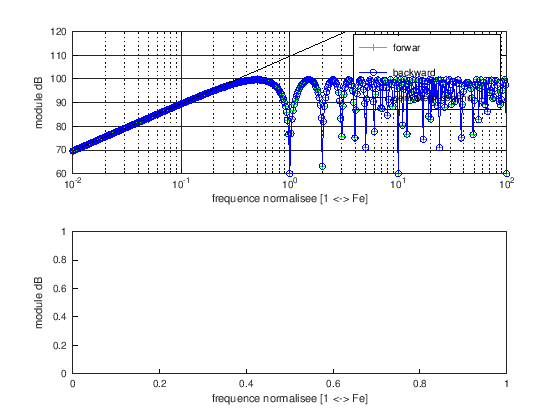

In [18]:
%% fonction pratique pour faire des dB et 
%% éviter les -infini à afficher etc.
dBbrut = @(gain) 20*log10(abs(gain));
sat = @(x, xmin, xmax) x.*(x>xmin).*(x<xmax)+xmin*(x<xmin)+xmax*(x>xmax);
dBde = @(gain) sat(dBbrut(gain),60, 120); % dB compris entre 60 et 120

%% VOTRE CORRECTION de ftilde=
% On veut un vecteur en échelle log allant de 0.01 à 2
% pour la fréquence normalisée. On garde le 1/100 de résolution
% Attention log est en base népérienne et log10 celui en base 10
ftilde = 10.^(-2:1/100:2); % de 10^-2 à 2

%% on redéfinit z et p pour ces fréquences
z = exp(i*2*pi*ftilde);
p = i*2*pi*ftilde*Fe;

%% VOTRE MODIFICATION
% Passer l'axe des fréquences en fréquences réelles [Hz]
subplot(211)
semilogx(ftilde,dBde(Hf(z)),'g+-'); hold on;
semilogx(ftilde,dBde(Hb(z)),'bo-'); 
semilogx(ftilde,dBde(p),'k'); grid on;
xlabel("frequence normalisee [1 <-> Fe]");
ylabel("module dB");
legend(["forwar";"backward";"derivateur continu"],"location","northeast")

%% VOTRE CODE
% affichant les 3 phases en degrés et fréquences réelles
subplot(212)
xlabel("frequence normalisee [1 <-> Fe]");
ylabel("module dB");


Les approximations de la dérivée ne sont valables que pour certaines fréquences !

 1) Identifiez, à la décade près, la plage de fréquence normalisée où le gain des approximations ne s'écartent pas plus de 3dB de la dérivée continue.
 2) Pour dériver un signal de parole entre 0 Hz et 8KHz quelle fréquence d'échantillonnage conviendrait 192kHz, 96kHz, 48 kHz, 24 kHz, 12 kHz, 8 kHz

 


## I3 - Transformée bilinéaire
---

Faites la même étude pour le dérivateur $h_t$ bilinéaire :

 1) fonction de transfert en z ;
 2) schéma géométrique des pôles et zéros ;
 3) équivalents géométriques en 0 et 0.5 et esquisse de réponse harmonique asymptotique ;
 4) calcul analytique (elle doit être purement imaginaire et un peu tangente !) ;
 5) tracé de la réponse harmonique en linéaire puis en diagramme de Bode ;
 6) vérifications avec octave.

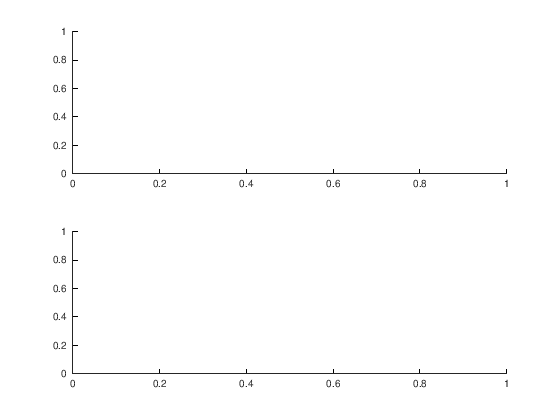

In [47]:
% fonctions de transfert 

%%VOTRE MODIF de Ht = 
% attention à bien demander les opérations élément par élément !
% genre x.*y ou x.^2 
Ht = @(z) ((z-1)*2/Te); % bilineaire ou Tustin ou trapezoidale

%%VOTRE BODE de Ht et de p continu
% Inspirez-vous du code précédent
dBde = @(gain) sat(dBbrut(gain), 60, 120); % dB compris entre 60 et 120
subplot(211);
% gain en dB avec semilogx et fréquences normalisées
hold on;
% gain en dB de p en noir
subplot(212);
% phase en degré avec semilogx et fréquences normalisées
hold on;
% phase en degré de p en noir


Donnez l'expression analytique de $H_t(\omega)$ que vous avez calculé et superposez l'affichage de la version numérique pour vérifier l'exactitude de vos calculs.

> **Cette fonction de transfert est très importante, car elle permet de   
> faire des synthèses de filtre à partir du continu**


In [19]:
%%VOTRE MODIF de Ht_analytique = 
% f est la fréquence normalisée !
Ht_analytique = @(f) cos(2*pi*f)/Te; 


%%VOTRE BODE de Ht, Ht analytique et p continu
% superposées avec hold on;


### I4 - Avec la boite à outils "control" 
---

Il est possible d'utiliser la boîte à outils "control" pour obtenir ces affichages en quelques lignes de code.
Remarquons que ces fonctions n'ont rien d'indispensable puisque nous avons pu tout faire avec des fonctions basiques et quelques conaissances théoriques. 

Donc on peut utiliser les mêmes fonctions qu'en continu :
 - tf(num, den, Te) : pour definir un système par sa fonction de transfert
 - bode
 - impulse 
 - pzmap
 
Définissons les fonctions de transfert avec `tf`

> La différence entre le continu et le discret se fait  
> **seulement en précisant un Te** lors de la définition de la fonction de transfert.  
> Les fonctions bode, impulse, step s'adaptent alors à un système discret

In [20]:
pkg load control %% pour octave uniquement, inutile avec matlab

% si tf reçoit un troisième argument alors c'est Te
%    et tf contruit un système discret
% coef des polynomes en z ! pas z^-1
backward=tf([1 -1]/Te , [1],Te) 
        %   (z -1)/Te /  1   = (z-1)/Te = Hb

forward=tf([1 -1]/Te ,[1 0],Te) 
        %  (z -1)/Te / z     = (1-z^-1)/Te = Hf

tustin= tf(2*[1 -1]/Te , [1 1],Te) 
        %  2 (z -1)/Te / (z+1)     = Ht

% système continu celui là!
derivateur = tf([1 0],[1])


Transfer function 'backward' from input 'u1' to output ...

 y1:  4.8e+04 z - 4.8e+04

Sampling time: 2.08333e-05 s
Discrete-time model.

Transfer function 'forward' from input 'u1' to output ...

      4.8e+04 z - 4.8e+04
 y1:  -------------------
               z         

Sampling time: 2.08333e-05 s
Discrete-time model.

Transfer function 'tustin' from input 'u1' to output ...

      9.6e+04 z - 9.6e+04
 y1:  -------------------
             z + 1       

Sampling time: 2.08333e-05 s
Discrete-time model.

Transfer function 'derivateur' from input 'u1' to output ...

 y1:  s

Continuous-time model.


#### Traçons le bode des fonctions

Utilisons `bode`

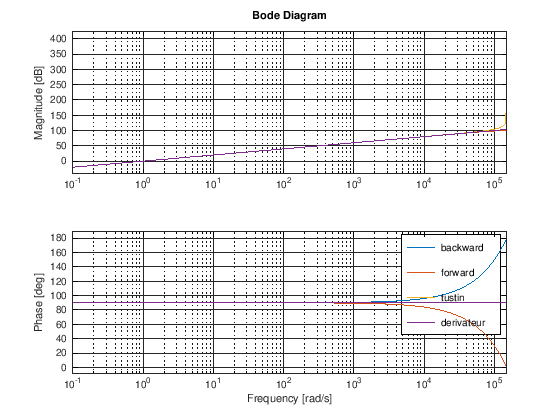

In [50]:
bode(backward,forward,tustin,derivateur)

**Critiquons l'outil !**
- Ne vous faites pas avoir, les Anglais semblent confondre fréquence et pulsation sur ce coup.
- Pas moyen d'afficher en fréquences plutôt que pulsation
- Pas moyen d'afficher en fréquences normalisées ou de repérer facilement la fréquence $F_e/2$

Spécifions les fréquences d'affichage pour voir l'aspect périodique du système :

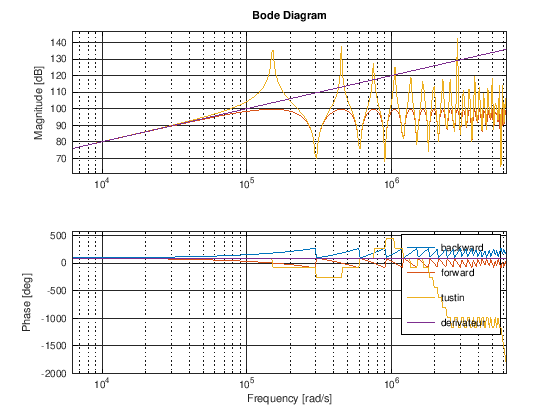

In [28]:
w=2*pi*(10.^(3:0.01:6)); %de 1kHz à 1MHz en échelle log
w=2*pi*logspace(3,6,300); % pour les faibles ! cela fait la même chose
bode(backward,forward,tustin,derivateur,w)

**Critiquons l'outil !**
- Les modulos $2\pi$ sur la phase sont gérés de manière surprenante surtout pour la bilinéaire.
- La fréquence d'échantillonnage et de Nyquist $Fe/2$ ne sont toujours pas clairement indiqué.
